In [4]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


# 10_07_2024

# IMPORTNG THE DATA

In [5]:
df = pd.read_csv(r"C:\Users\saile\Downloads\spam.csv")

In [6]:
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'].values)

In [7]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [8]:
#### Which is repeating more

In [9]:
!pip install wordcloud

In [10]:
from wordcloud import WordCloud

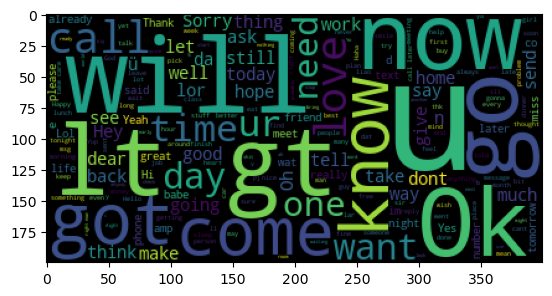

In [11]:
ham_plot = WordCloud().generate(ham_words)
plt.imshow(ham_plot)

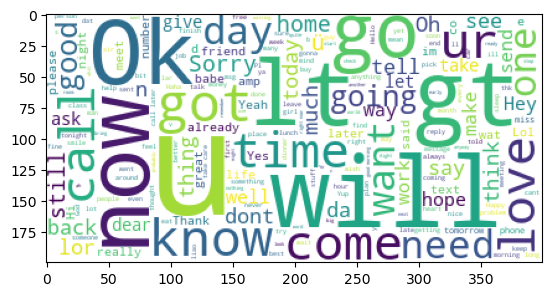

In [12]:
# for cplor change

ham_plot = WordCloud(background_color='white').generate(ham_words)
plt.imshow(ham_plot)

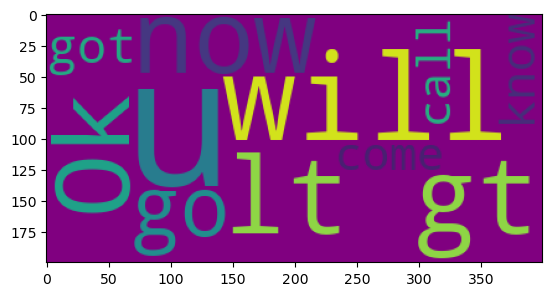

In [13]:
# color change for words and maximum words

ham_plot = WordCloud(max_words=10,background_color='purple').generate(ham_words)
plt.imshow(ham_plot)

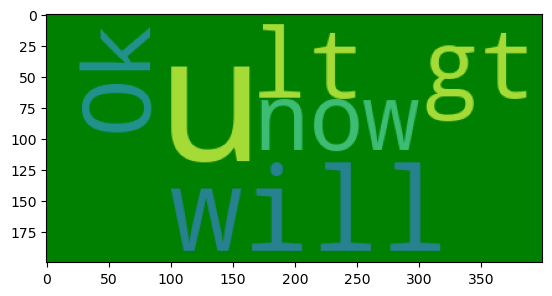

In [14]:
# only for spam words

spam_words = ' '.join(df[df['Category'] == 'ham']['Message'].values)
spam_plot = WordCloud(max_words=5,background_color='green').generate(spam_words)
plt.imshow(spam_plot)



In [15]:
# increse for sizr of plot

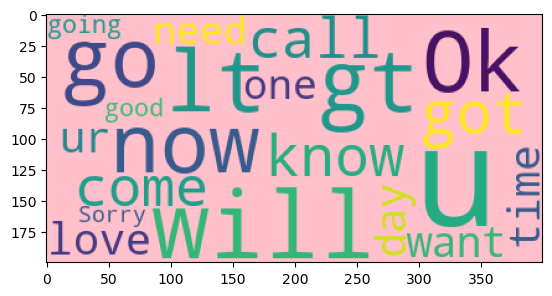

In [16]:

spam_words = ' '.join(df[df['Category'] == 'ham']['Message'].values)
spam_plot = WordCloud(min_font_size = 10,max_words=20,background_color='pink').generate(spam_words)
plt.imshow(spam_plot)


<Axes: xlabel='Category'>

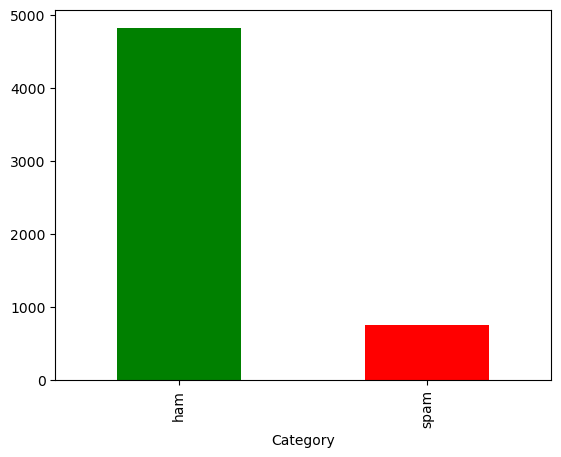

In [17]:
# how many spam and ham mails


df['Category'].value_counts().plot(kind = 'bar',color = ['green','red'])

In [18]:
# dropping of categorical column



In [19]:
x = df.drop[Category,axis=1]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2502196386.py, line 1)

# BAG OF WORDS

In [20]:
from sklearn.feature_extraction.text import CountVectorizer 

In [21]:
bow = CountVectorizer(stop_words = 'english')

In [22]:
bow.fit(df['Message'])
x = bow.transform(df['Message']).toarray()
y = df['Category']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=23)

In [25]:
y_train

1627     ham
4608     ham
2709     ham
639      ham
4544     ham
        ... 
2998     ham
1993    spam
1064    spam
4838     ham
595      ham
Name: Category, Length: 4457, dtype: object

# KNN

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

# NAIVE BAYES

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb =  MultinomialNB()
nb.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

# pickling

In [29]:
import pickle

In [30]:
model=pickle.dump(nb,open('model.pkl','wb'))

In [32]:
pickle.load(open('model.pkl','rb'))

MultinomialNB()

# Bow

In [33]:
bow_pkl=pickle.dump(bow,open('bow.pkl','wb'))

In [36]:
bow_pkl1=pickle.load(open('bow.pkl','rb'))

In [37]:
bow_pkl1.transform(["Hello,how are ypu? i am glad to see yoy."])

<1x8440 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

# DEPLOYMENT

In [34]:
email = input('enter mail id: ')
data = bow.transform([email]).toarray()
nb.predict(data)[0]

enter mail id: 1.We have detected unusual activity in your account and require immediate verification to prevent suspension. Please click the link below to verify your information


'spam'

In [35]:
email = input('enter mail id: ')
data = bow.transform([email]).toarray()
nb.predict(data)[0]

enter mail id: 2. We are excited to inform you that you have won the grand prize in our international lottery draw! Your email was randomly selected as the winner of $1,000,000.00.To claim your prize, please provide the following information


'spam'

In [37]:
# if outcome is spam it for result

In [47]:
email = input('enter mail id: ')
data = bow.transform([email]).toarray()
nb.predict(data)[0]

enter mail id: email = input('enter mail id: ') data = bow.transform([email]).toarray() nb.predict(data)[0]


'ham'

In [48]:
import os 

In [49]:
os.getcwd()

'C:\\Users\\saile\\AI MACHINE LEARNING'